![Nuclio logo](.\img\nucleoDS-newBlack.png)

# Project Pre-Processing
## Group Components:
<span style="color:Yellow"><font size="3">__Eser Isler__<br></span></font>
<span style="color:Yellow"><font size="3">__Joao Canvezes__</span></font>

 ## __*SYNOPSIS*__
 
### Part *A* - Preprocessing
<font size="3"> You are given a data set that contains details of a bank's customers. The task here is to use the pre-processing techniques shown in the class to clean and transform this data set. </font>

 ### __*INPUTS*__
 <font size="3"> The dataset in use is -> __"./chrun_data_before_processing.csv"__ </font>

 ### __*Outputs*__
 <font size="3"> Same Dataset Pre-Processed </font>


## __*Libraries used on this project*__
| Libraries     | Alias         | Description  |
| ------------- |:-------------:|:-------------|
|Pandas         | pd | Main library used for data manipulation and analysis manipulation tool |
|Numpy          | np | Library to operate multi-dimensional Arrays, collections and matrices |
|Matplotlib     | plt | Library used to visualize the dataframe|
|Sklearn.preprocessing |   | import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, MinMaxScaler, StandardScaler, Normalizer|

## __Part-1 Exploratory Dataset Analisys__
### First, we need to import the librariess to be used during this code. 

In [3589]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, MinMaxScaler, StandardScaler, Normalizer


### After importing the library, we need to import our target Dataset used on this project. We will use the command -> ```pd.read_csv()```


In [3590]:
# Using pd.read:csv() to load dataframe using "," as separator and force new index starting from "Zero"
df_churn_data = pd.read_csv("churn_data_before_processing.csv", sep=',',index_col=0)

# We can check that the Dataframe table is correctly loaded printing the 10 first rows
print(df_churn_data.head(10), sep='\n')

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave        619.0    France  Female  42.0   
1          2    15647311      Hill        608.0     Spain  Female  41.0   
2          3    15619304      Onio        502.0    France  Female  42.0   
3          4    15701354      Boni        699.0    France  Female  39.0   
4          5    15737888  Mitchell        850.0     Spain  Female  43.0   
5          6    15574012       Chu        645.0     Spain    Male  44.0   
6          7    15592531  Bartlett        822.0    France    Male  50.0   
7          8    15656148    Obinna        376.0   Germany  Female  29.0   
8          9    15792365        He        501.0    France    Male  44.0   
9         10    15592389       NaN        684.0    France    Male  27.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00            1.0        1.0             1.0   
1     1.0   83807.86            1.0       

### The first row [RowNumber] is possibly just left over from data export, and, therefore, we can drop it.

In [3591]:
# Drop entire [RowNumber] column inplace
df_churn_data.drop('RowNumber', axis=1, inplace=True)

# Checking the Dataframe
print(df_churn_data.head(10), df_churn_data, sep='\n')

   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave        619.0    France  Female  42.0     2.0   
1    15647311      Hill        608.0     Spain  Female  41.0     1.0   
2    15619304      Onio        502.0    France  Female  42.0     8.0   
3    15701354      Boni        699.0    France  Female  39.0     1.0   
4    15737888  Mitchell        850.0     Spain  Female  43.0     2.0   
5    15574012       Chu        645.0     Spain    Male  44.0     8.0   
6    15592531  Bartlett        822.0    France    Male  50.0     7.0   
7    15656148    Obinna        376.0   Germany  Female  29.0     4.0   
8    15792365        He        501.0    France    Male  44.0     4.0   
9    15592389       NaN        684.0    France    Male  27.0     2.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00            1.0        1.0             1.0        101348.88   
1   83807.86            1.0        0.0             1.0   

### As [RowNumber], [CustomerId] and [Surname] does not offer us extra value on the prediction, so to save memorying and processing, we are also dropping it.

In [3592]:
# Drop entire [Surname] column inplace
df_churn_data.drop('Surname', axis=1, inplace=True)

# Drop entire [CustomerId] column inplace
df_churn_data.drop('CustomerId', axis=1, inplace=True)

# Checking the Dataframe
print(df_churn_data.head(10), df_churn_data, sep='\n')

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0     2.0       0.00            1.0   
1        608.0     Spain  Female  41.0     1.0   83807.86            1.0   
2        502.0    France  Female  42.0     8.0  159660.80            3.0   
3        699.0    France  Female  39.0     1.0       0.00            2.0   
4        850.0     Spain  Female  43.0     2.0  125510.82            1.0   
5        645.0     Spain    Male  44.0     8.0  113755.78            2.0   
6        822.0    France    Male  50.0     7.0       0.00            2.0   
7        376.0   Germany  Female  29.0     4.0  115046.74            4.0   
8        501.0    France    Male  44.0     4.0  142051.07            2.0   
9        684.0    France    Male  27.0     2.0  134603.88            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             1.0        101348.88       1  
1        0.0             1.0        112542.58      

In [3593]:
# First, lets look for duplicates. Send results to another Dataframe and print to check the Duplicates
df_churn_data_duplicates = df_churn_data[df_churn_data.duplicated(keep=False)]

# Now printing the resultant Dataset with the duplicated values just to check how many duplicate values exists
print("All Duplicate Rows based on all columns are : ", '\n', df_churn_data_duplicates,sep='\n')

All Duplicate Rows based on all columns are : 


      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
8           501.0    France    Male  44.0     4.0  142051.07            2.0   
151         535.0    France  Female  48.0     9.0       0.00            1.0   
227         547.0   Germany  Female  39.0     6.0   74596.15            3.0   
326         594.0    France    Male  35.0     2.0       0.00            2.0   
410         709.0     Spain    Male  23.0    10.0       0.00            2.0   
...           ...       ...     ...   ...     ...        ...            ...   
6523        671.0     Spain  Female  31.0     4.0       0.00            2.0   
3612        635.0     Spain  Female  37.0     3.0       0.00            2.0   
4437        736.0    France  Female  24.0     0.0       0.00            2.0   
6549        620.0    France    Male  32.0     6.0       0.00            2.0   
8           501.0    France    Male  44.0     4.0  142051.07            2.0   

  

### Now we know that this dataset has a total of 208 duplicated rows. The next step is to exclude the duplicated Rows.

In [3594]:
#Now we drop the duplicates with the argument "inplace"
df_churn_data.drop_duplicates(inplace=True)

#Now print dataframe without the Duplicates
print("Dataframe whituout duplicated rows:", "\n", pd.DataFrame(df_churn_data))

Dataframe whituout duplicated rows: 
       CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           619.0    France  Female  42.0     2.0       0.00            1.0   
1           608.0     Spain  Female  41.0     1.0   83807.86            1.0   
2           502.0    France  Female  42.0     8.0  159660.80            3.0   
3           699.0    France  Female  39.0     1.0       0.00            2.0   
4           850.0     Spain  Female  43.0     2.0  125510.82            1.0   
...           ...       ...     ...   ...     ...        ...            ...   
7511        757.0    France    Male   NaN     0.0       0.00            1.0   
8610        730.0    France    Male  23.0     8.0       0.00            2.0   
2997        655.0    France  Female  26.0     NaN  106198.50            1.0   
3856        679.0   Germany  Female  32.0     0.0   88335.05            NaN   
4590        635.0    France  Female  78.0     6.0   47536.40            1.0   

      HasCrCa

In [3595]:
# We can confirm that the duplicates are removed counting the duplicates on our DataFrame
print("Sum of duplicated value: ", df_churn_data.duplicated().sum())

Sum of duplicated value:  0


### After successfully removing the duplicated values, let's proceed to extract more Dataset Infos before proceeding to check for missing data.

In [3596]:
#We can also query the info to know how our Dataframe visualizes all the columns type.
print("Showing DataFrame Info:")
print(df_churn_data.info())

Showing DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10046 entries, 0 to 4590
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10028 non-null  float64
 1   Geography        9850 non-null   object 
 2   Gender           9763 non-null   object 
 3   Age              9775 non-null   float64
 4   Tenure           9966 non-null   float64
 5   Balance          9890 non-null   float64
 6   NumOfProducts    9758 non-null   float64
 7   HasCrCard        9963 non-null   float64
 8   IsActiveMember   9959 non-null   float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10046 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 941.8+ KB
None


### We have a total of __12 Columns__, only 3 of then are not a numeric type. this dataset is formed by Informations about the customer with a column with the feature that we want be able to predict: ```Exited```

In [3597]:
#What is the Shape of the dataset? To answer we will print the dataframe using the method .shape
print("Printing dataframe shape: ", df_churn_data.shape)

Printing dataframe shape:  (10046, 11)


In [3598]:
#Start by take the Qunatiles into account
print("Description of the DataFrame: ", "\n", df_churn_data.describe())

Description of the DataFrame:  
         CreditScore          Age       Tenure       Balance  NumOfProducts  \
count  10028.000000  9775.000000  9966.000000  9.890000e+03    9758.000000   
mean     650.895046    38.945269     5.016768  7.675722e+04       1.528098   
std      100.319047    10.568860     2.926688  6.370337e+04       0.593187   
min      350.000000   -49.000000    -5.000000  0.000000e+00      -2.000000   
25%      584.000000    32.000000     3.000000  0.000000e+00       1.000000   
50%      652.000000    37.000000     5.000000  9.726268e+04       1.000000   
75%      718.000000    44.000000     7.000000  1.276520e+05       2.000000   
max     2924.008649    92.000000    40.066513  1.036826e+06      11.177460   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  9963.000000     9959.000000     10002.000000  10046.000000  
mean      0.705510        0.514710    100079.821011      0.203564  
std       0.455836        0.499809     57489.484584      0.4

### From the Describe information, we can already detect that some Data in Some rows are missing because we have [RowNumber]=10150, but some of the other columns have less information i.E [AGE]=9879.
### Lets start to look for __missing values__

In [3599]:
#Is there any "null"?
print("Boolean -> Is there any missing values: ", "\n", df_churn_data.isnull().any())

Boolean -> Is there any missing values:  
 CreditScore         True
Geography           True
Gender              True
Age                 True
Tenure              True
Balance             True
NumOfProducts       True
HasCrCard           True
IsActiveMember      True
EstimatedSalary     True
Exited             False
dtype: bool


### with the exception of the [CustomerId] and [Exited] columns, all columns have missing values.
### The next question is, how many values are missing on each column.

In [3600]:
#Sum missing Data per colmun
print("Missing Data per column: ", "\n", df_churn_data.isnull().sum())

Missing Data per column:  
 CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64


## __Part-2 Uni-variate Analisys__
### Now we analyse every column in our DataFrame to understand tendencies, datect outliers and treating missing values.

### First step is to analyze the columns that might contain helpful information that can be used to predict Churn.

In [3601]:
# Because we have to do the same steps repeatedly, we made this function to retrieve the information for each Column.
# Usage: analysis df.column

def analysis(x):
    if x.dtype == float or int:
        if x.value_counts().sum() > 3:
            print(x.name, "column description: ", "\n", x.describe(), "\n")
            print("Missing Data count for the column", x.name, "=", x.isna().sum())
    else:
        print(x.value_counts(dropna=False))

In [3602]:
# Now Recursevely, we will cast this function over all over our Dataset.
for column in df_churn_data.columns:
    analysis(df_churn_data[column])

CreditScore column description:  
 count    10028.000000
mean       650.895046
std        100.319047
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max       2924.008649
Name: CreditScore, dtype: float64 

Missing Data count for the column CreditScore = 18
Geography column description:  
 count       9850
unique         3
top       France
freq        4941
Name: Geography, dtype: object 

Missing Data count for the column Geography = 196
Gender column description:  
 count     9763
unique       2
top       Male
freq      5323
Name: Gender, dtype: object 

Missing Data count for the column Gender = 283
Age column description:  
 count    9775.000000
mean       38.945269
std        10.568860
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64 

Missing Data count for the column Age = 271
Tenure column description:  
 count    9966.000000
mean        5.016768
std         

### Now, let's go ahead and finalize our Uni-Variante Analysis is checking quantiles for continuous and Histogram or frequency tables for categorical features.
### After preliminary analysis, here is the separation between the variables:
| ColumnName     | dtype        | Variable_Classification |
| ---------------|:------------:|:------------------------|
|CustomerId      | int64        | Categorical             |
|Surname         | object       | Categorical             |
|CreditScore     | float64      | Continuous              |
|Geography       | object       | Categorical             |
|Gender          | object       | Categorical             |
|Age             | float64      | Discrete                |
|Tenure          | float64      | Continuous              |
|Balance         | float64      | Continuous              |
|NumOfProducts   | float64      | Discrete                |
|HasCrCard       | float64      | Categorical             |
|IsActiveMember  | float64      | Categorical             |
|EstimatedSalary | float64      | Continuous              |
|Exited          | int64        | Categorical             |

### Now processing with analysis based on Variable classification.

## __Part-3 Data Cleaning__
### Now we remove NaN's and outliers that are not necessary from our Dataset

## __CreditScore__

CreditScore Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


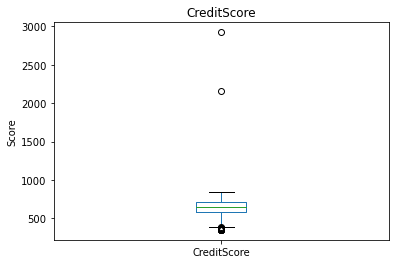

In [3603]:
# Printing plot to check data distribuition
print("CreditScore Plot: ", "\n", df_churn_data.CreditScore.plot(title='CreditScore', ylabel='Score', kind='box'))

### The data is not normally distributed that's why it is necessary to take the median instead of mean

In [3604]:
# Saving in a variable to use later
value_CreditScore_median = df_churn_data.CreditScore.median()
print("value_CreditScore_median =", value_CreditScore_median)

value_CreditScore_median = 652.0


In [3605]:
# Now filling all 'na' values with the median value
df_churn_data.CreditScore = df_churn_data.CreditScore.fillna(value_CreditScore_median)

# Using our function to check if there are still any missing values
print(analysis(df_churn_data.CreditScore))

CreditScore column description:  
 count    10046.000000
mean       650.897026
std        100.229135
min        350.000000
25%        584.000000
50%        652.000000
75%        717.000000
max       2924.008649
Name: CreditScore, dtype: float64 

Missing Data count for the column CreditScore = 0
None


In [3606]:
# Because there are only 2 Customers with CreditScore of this magnitude, we can remove them as outliers.
print(df_churn_data.loc[(df_churn_data['CreditScore'] >= 1000)])

      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
2258  2158.510025    France  Female  36.0     5.0  119540.15            1.0   
8493  2924.008649   Germany  Female  46.0     9.0  113909.69            3.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
2258        0.0             1.0         80603.99       0  
8493        1.0             0.0         92320.37       1  


CreditScore Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


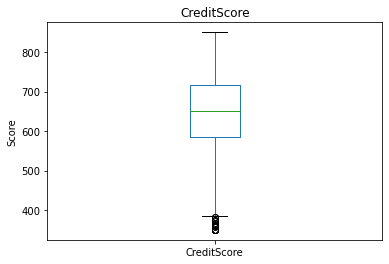

In [3607]:
# To finish with this Variable, let us eliminate the outliers once we determine that they are not contribuiting to the prediction.
# Eliminate everything over 1000
f = lambda x : value_CreditScore_median if x > 1000 else x 
df_churn_data.CreditScore = df_churn_data.CreditScore.map(f)

# Making Box plot again to check if there are no more outliers
print("CreditScore Plot: ", "\n", df_churn_data.CreditScore.plot(title='CreditScore', ylabel='Score', kind='box'))

### CreditScore cleanning is Complete, now doing the same to all other columns.

## __Geography__

In [3608]:
#Checking the frequency of different variables
print("Geography column details: ", "\n", df_churn_data.Geography.value_counts(dropna=False))

Geography column details:  
 France     4941
Germany    2463
Spain      2446
NaN         196
Name: Geography, dtype: int64


### Because there are no Invalid Values, we can live as it is. We will just replace "NaN" values to "No information available" so we can filter it later.

In [3609]:
# Replace "NaN" values
df_churn_data.loc[df_churn_data.Geography.isna(), "Geography"] = "No information available"

# Check the new variables distribuition
print("Geography column details after replace: ", "\n", df_churn_data.Geography.value_counts(dropna=False))

Geography column details after replace:  
 France                      4941
Germany                     2463
Spain                       2446
No information available     196
Name: Geography, dtype: int64


In [3610]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.Geography))

Geography column description:  
 count      10046
unique         4
top       France
freq        4941
Name: Geography, dtype: object 

Missing Data count for the column Geography = 0
None


## __Gender__

In [3611]:
#Checking the frequency of different variables
print("Gender column details: ", "\n", df_churn_data.Gender.value_counts(dropna=False))

Gender column details:  
 Male      5323
Female    4440
NaN        283
Name: Gender, dtype: int64


### Because there are no Invalid Values, we can live as it is. We will just replace "NaN" values to "No information available" so we can filter it later.

In [3612]:
# Replace "NaN" values
df_churn_data.loc[df_churn_data.Gender.isna(), "Gender"] = "No information available"

# Check the new variables distribuition
print("Gender column details after replace: ", "\n", df_churn_data.Gender.value_counts(dropna=False))

Gender column details after replace:  
 Male                        5323
Female                      4440
No information available     283
Name: Gender, dtype: int64


In [3613]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.Gender))

Gender column description:  
 count     10046
unique        3
top        Male
freq       5323
Name: Gender, dtype: object 

Missing Data count for the column Gender = 0
None


## __AGE__

Age Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


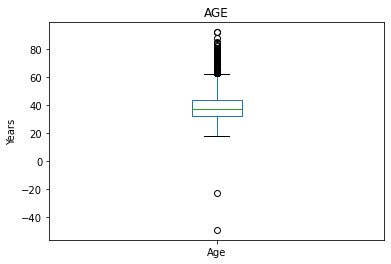

In [3614]:
# Printing plot to check data distribuition
print("Age Plot: ", "\n", df_churn_data.Age.plot(title='AGE', ylabel='Years', kind='box'))


### Because it is impossible to have negative age, and we cannot confirm it is a typo, we will drop the outliers altogether.

In [3615]:
# Checking frequency of the outliers
print(df_churn_data.loc[(df_churn_data['Age'] < 0)])

      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
1383        571.0    France  Female -23.0    10.0  151097.28            1.0   
9783        601.0   Germany  Female -49.0     4.0   96252.98            2.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1383        0.0             1.0         17163.75       0  
9783        1.0             NaN        104263.82       0  


### Because there are only 2 Customers with Negative Age, we can remove them as outliers.

Age Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


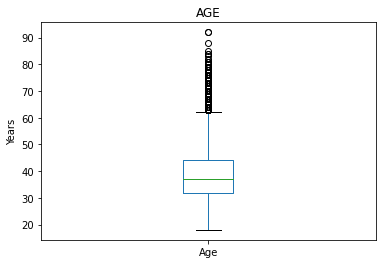

In [3616]:
# Eliminate everything under 0
df_churn_data = df_churn_data[df_churn_data['Age'] > 0 ]

# Printing plot to check data distribuition
print("Age Plot: ", "\n", df_churn_data.Age.plot(title='AGE', ylabel='Years', kind='box'))

In [3617]:
# Checking the mean value again to check if it is still stable and save in a variable to use later
value_age_median = df_churn_data.Age.median()
print("value_age_median =", value_age_median)

value_age_median = 37.0


In [3618]:
# Now filling all 'na' values with the median value
df_churn_data.Age = df_churn_data.Age.fillna(value_age_median)

# Using our function to check if there are still any missing values
print(analysis(df_churn_data.Age))

Age column description:  
 count    9773.000000
mean       38.960606
std        10.513766
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64 

Missing Data count for the column Age = 0
None


## __Tenure__

Tenure Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


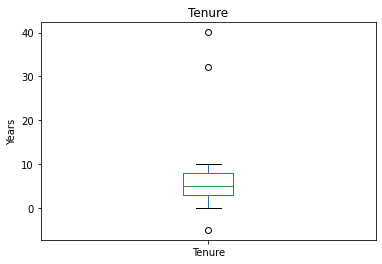

In [3619]:
# Printing plot to check data distribuition
print("Tenure Plot: ", "\n", df_churn_data.Tenure.plot(title='Tenure', ylabel='Years', kind='box'))

### It should not be possible to have Tenure less than Zero

In [3620]:
# Checking frequency of the outliers - Invalid
print(df_churn_data.loc[(df_churn_data['Tenure'] < 0)])

      CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
6893        578.0    France   Male  50.0    -5.0  151215.34            2.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6893        1.0             0.0         169804.4       0  


### Because there are only 1 Customers with Negative Tenure, we can remove them as outliers.

In [3621]:
# Checking frequency of the outliers - High Values (>75%)
print(df_churn_data.loc[(df_churn_data['Tenure'] > 30)])

      CreditScore Geography  Gender   Age     Tenure    Balance  \
5204        430.0    France  Female  33.0  32.044103       0.00   
5039        660.0    France  Female  38.0  40.066513  110570.78   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
5204            1.0        1.0             1.0         69759.91       0  
5039            2.0        1.0             0.0        195906.59       0  


### Those outliers can confuse our model because of the High value and small frequency. High Values (>75%)

Tenure Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


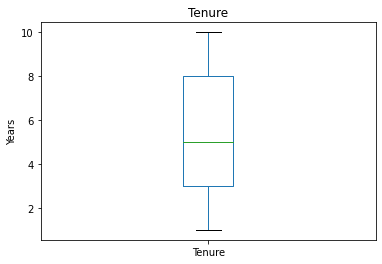

In [3622]:
# Eliminate everything under 0 and over 30
df_churn_data = df_churn_data[(df_churn_data['Tenure'] > 0) & (df_churn_data['Tenure'] < 30 )]

# Printing plot to check data distribuition
print("Tenure Plot: ", "\n", df_churn_data.Tenure.plot(title='Tenure', ylabel='Years', kind='box'))

In [3623]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.Tenure))

Tenure column description:  
 count    9289.000000
mean        5.226827
std         2.753259
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64 

Missing Data count for the column Tenure = 0
None


### Because there are no Missing Values, we will proceed wihtout have to fill "NaN" values.

## __Balance__

Balance Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


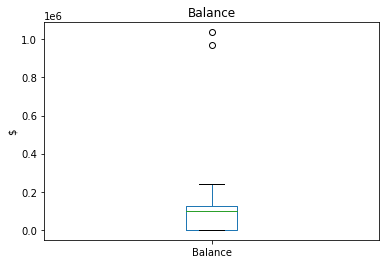

In [3624]:
# Printing plot to check data distribuition
print("Balance Plot: ", "\n", df_churn_data.Balance.plot(title='Balance', ylabel='$', kind='box'))

In [3625]:
# Checking frequency of the outliers.
print(df_churn_data.loc[(df_churn_data['Balance'] > 0.8e6)])

      CreditScore Geography  Gender   Age  Tenure       Balance  \
2135        736.0   Germany    Male  57.0     9.0  9.697802e+05   
5464        556.0    France  Female  36.0     2.0  1.036826e+06   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
2135            1.0        1.0             0.0         28434.44       1  
5464            1.0        0.0             1.0        177670.57       0  


### Because there are only 1 Customers with extreme high Balance, but they are not invalid like Age and Tenure. That is why we will transform it

In [3626]:
# Checking the mean value again to check if it is still stable and save in a variable to use later
value_balance_median = df_churn_data.Balance.median()
print("value_balance_median =", value_balance_median)

value_balance_median = 96986.03


In [3627]:
# Now filling all 'NaN' values with the median value
df_churn_data.Balance = df_churn_data.Balance.fillna(value_balance_median)

Balance Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


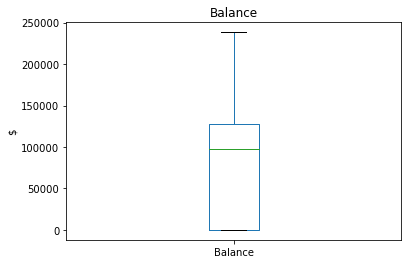

In [3628]:
# Lets replace the Outlier with th median because its look like it is not an error, but a genuine outlier.
df_churn_data.loc[df_churn_data.Balance > 0.8e6, 'Balance'] = value_balance_median

# Printing plot to check data distribuition
print("Balance Plot: ", "\n", df_churn_data.Balance.plot(title='Balance', ylabel='$', kind='box'))

In [3629]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.Balance))

Balance column description:  
 count      9289.000000
mean      76701.522216
std       61890.370569
min           0.000000
25%           0.000000
50%       96986.030000
75%      127211.450000
max      238387.560000
Name: Balance, dtype: float64 

Missing Data count for the column Balance = 0
None


## __NumOfProducts__

NumOfProducts Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


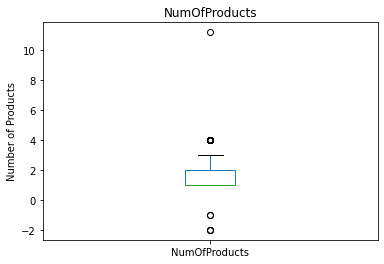

In [3630]:
# Printing plot to check data distribuition
print("NumOfProducts Plot: ", "\n", df_churn_data.NumOfProducts.plot(title='NumOfProducts', ylabel='Number of Products', kind='box'))

### Have negative products should not be possible. Because we can not confirm or Deny if it is a typo, we need to remove them from the DataSet

In [3631]:
# Checking frequency of the outliers
print(df_churn_data.loc[(df_churn_data['NumOfProducts'] < 0)])

      CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
1389        627.0    France  Female  55.0     2.0  159441.27           -1.0   
4251        601.0    France    Male  35.0     2.0       0.00           -2.0   
4613        745.0    France  Female  46.0     7.0       0.00           -2.0   
7409        807.0   Germany  Female  42.0     9.0  105356.09           -2.0   
8105        659.0     Spain    Male  60.0     2.0       0.00           -1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1389        1.0             0.0        100686.11       1  
4251        1.0             1.0        118983.18       0  
4613        1.0             NaN         67769.94       0  
7409        1.0             1.0        130489.37       0  
8105        1.0             0.0        177480.45       1  


### Because there are only 4 Customers with Negative Products, we can remove them as invalid outliers.

In [3632]:
# Checking frequency of the outliers - Higher than 75%
print(df_churn_data.loc[(df_churn_data['NumOfProducts'] > 4)])

      CreditScore Geography Gender   Age  Tenure  Balance  NumOfProducts  \
6909        666.0     Spain   Male  43.0     5.0      0.0       11.17746   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6909        1.0             0.0          29346.1       0  


### Those outliers can confuse our model because of the High value and small frequency. High Values (>75%)

NumOfProducts Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


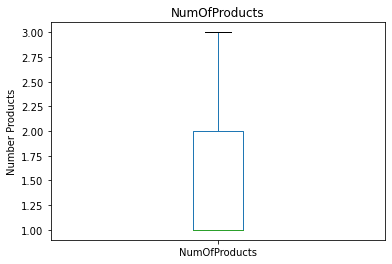

In [3633]:
# Eliminate everything under 0
df_churn_data = df_churn_data[(df_churn_data['NumOfProducts'] >= 0 ) & (df_churn_data['NumOfProducts'] < 4)]

# Printing plot to check data distribuition
print("NumOfProducts Plot: ", "\n", df_churn_data.NumOfProducts.plot(title='NumOfProducts', ylabel='Number Products', kind='box'))

In [3634]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.NumOfProducts))

NumOfProducts column description:  
 count    8962.000000
mean        1.516403
std         0.551356
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: NumOfProducts, dtype: float64 

Missing Data count for the column NumOfProducts = 0
None


## __HasCrCard__

In [3635]:
#Checking the frequency of different variables
print("HasCrCard column details: ", "\n", df_churn_data.HasCrCard.value_counts(dropna=False))

HasCrCard column details:  
 1.0    6285
0.0    2604
NaN      73
Name: HasCrCard, dtype: int64


### Because there are no Invalid Values, we can live as it is. We will just replace "NaN" values to "No information available" so we can filter it later.

In [3636]:
# Replace "NaN" values
df_churn_data.loc[df_churn_data.HasCrCard.isna(), "HasCrCard"] = "No information available"

# Check the new variables distribuition
print("HasCrCard column details after replace: ", "\n", df_churn_data.HasCrCard.value_counts(dropna=False))

HasCrCard column details after replace:  
 1.0                         6285
0.0                         2604
No information available      73
Name: HasCrCard, dtype: int64


In [3637]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.HasCrCard))

HasCrCard column description:  
 count     8962.0
unique       3.0
top          1.0
freq      6285.0
Name: HasCrCard, dtype: float64 

Missing Data count for the column HasCrCard = 0
None


## __IsActiveMember__

In [3638]:
#Checking the frequency of different variables
print("IsActiveMember column details: ", "\n", df_churn_data.IsActiveMember.value_counts(dropna=False))

IsActiveMember column details:  
 1.0    4587
0.0    4303
NaN      72
Name: IsActiveMember, dtype: int64


### Because there are no Invalid Values, we can live as it is. We will just replace "NaN" values to "No information available" so we can filter it later.

In [3639]:
# Replace "NaN" values
df_churn_data.loc[df_churn_data.IsActiveMember.isna(), "IsActiveMember"] = "No information available"

# Check the new variables distribuition
print("IsActiveMember column details after replace: ", "\n", df_churn_data.IsActiveMember.value_counts(dropna=False))

IsActiveMember column details after replace:  
 1.0                         4587
0.0                         4303
No information available      72
Name: IsActiveMember, dtype: int64


In [3640]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.IsActiveMember))

IsActiveMember column description:  
 count     8962.0
unique       3.0
top          1.0
freq      4587.0
Name: IsActiveMember, dtype: float64 

Missing Data count for the column IsActiveMember = 0
None


## __EstimatedSalary__

EstimatedSalary Plot:  
 AxesSubplot(0.125,0.125;0.775x0.755)


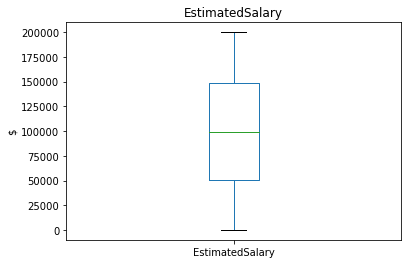

In [3641]:
# Printing plot to check data distribuition
print("EstimatedSalary Plot: ", "\n", df_churn_data.EstimatedSalary.plot(title='EstimatedSalary', ylabel='$', kind='box'))

### This Column looks balanced, we will take the __Mean__ values to fill __"NaN"__

In [3642]:
# Checking the mean value again to check if it is still stable and save in a variable to use later
value_EstimatedSalary_mean = df_churn_data.EstimatedSalary.mean()
print("value_EstimatedSalary_mean =", value_EstimatedSalary_mean)

value_EstimatedSalary_mean = 99643.36228587433


In [3643]:
# Now filling all 'NaN' values with the median value
df_churn_data.EstimatedSalary = df_churn_data.EstimatedSalary.fillna(value_EstimatedSalary_mean)

In [3644]:
# Using our function to check if there are still any missing values
print(analysis(df_churn_data.EstimatedSalary))

EstimatedSalary column description:  
 count      8962.000000
mean      99643.362286
std       57454.770485
min          11.580000
25%       50783.295000
50%       99643.362286
75%      148672.705000
max      199992.480000
Name: EstimatedSalary, dtype: float64 

Missing Data count for the column EstimatedSalary = 0
None


## __Exited__

In [3645]:
#Checking the frequency of different variables
print("Exited column details: ", "\n", df_churn_data.Exited.value_counts(dropna=False))

Exited column details:  
 0    7203
1    1759
Name: Exited, dtype: int64


### Because no Data is missing, no further cleaning is necessary.

### Now that Dataset is clean Let's save a clean version and continue with processing

In [3646]:
# Save the result DataSet into a new CSV File
df_churn_data.to_csv("churn_data_clean.csv", sep=',', index=False)


## __Part-4 Data Transformation__
### Transforming categorical and Scaling Continuous variables

In [3647]:
# Using pd.read:csv() to load dataframe using "," as separator and force new index starting from "Zero"
df_churn_data_clean = pd.read_csv("churn_data_clean.csv", sep=',')

# Printing the table to check if everything looks clean
print(df_churn_data_clean.head(10))

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0     2.0       0.00            1.0   
1        608.0     Spain  Female  41.0     1.0   83807.86            1.0   
2        502.0    France  Female  42.0     8.0  159660.80            3.0   
3        699.0    France  Female  39.0     1.0       0.00            2.0   
4        850.0     Spain  Female  43.0     2.0  125510.82            1.0   
5        645.0     Spain    Male  44.0     8.0  113755.78            2.0   
6        822.0    France    Male  50.0     7.0       0.00            2.0   
7        501.0    France    Male  44.0     4.0  142051.07            2.0   
8        684.0    France    Male  27.0     2.0  134603.88            1.0   
9        528.0    France    Male  31.0     6.0  102016.72            2.0   

  HasCrCard            IsActiveMember  EstimatedSalary  Exited  
0       1.0                       1.0        101348.88       1  
1       0.0                      

### After Load the Dataset, we will check if the data is consistent and without null values

In [3648]:
# Checking data Info
print(df_churn_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8962 entries, 0 to 8961
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8962 non-null   float64
 1   Geography        8962 non-null   object 
 2   Gender           8962 non-null   object 
 3   Age              8962 non-null   float64
 4   Tenure           8962 non-null   float64
 5   Balance          8962 non-null   float64
 6   NumOfProducts    8962 non-null   float64
 7   HasCrCard        8962 non-null   object 
 8   IsActiveMember   8962 non-null   object 
 9   EstimatedSalary  8962 non-null   float64
 10  Exited           8962 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 770.3+ KB
None


In [3649]:
# Checking missing values
print(df_churn_data_clean.isna().any())

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


### With the check of the way lets start with Processing

## __Geography:__ Processing

### Because it is a categorical value, we will divide encode with One Hot Encoder and eliminate only the [No information available] Column.

In [3650]:
# Initialize OneHotEncoder
one_encoder = OneHotEncoder(sparse=False)

# Reshape the columns to prepare to Encode
reshaped_column_geography = np.array(df_churn_data_clean.Geography).reshape(len(df_churn_data_clean.Geography),1)

# Apply the encoded categorical value
encoded_geography = one_encoder.fit_transform(reshaped_column_geography)

#Check the encoded result
print(encoded_geography)



[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [3651]:
#Create new Dataframe Based on the eoncoded value
df_encoded_geography = pd.DataFrame(encoded_geography,columns=one_encoder.categories_)

# Change Multi-Index
df_encoded_geography.columns = [multi_col[0] for multi_col in df_encoded_geography.columns]

# Check the encoded Dataframe
print(df_encoded_geography.head(10))


   France  Germany  No information available  Spain
0     1.0      0.0                       0.0    0.0
1     0.0      0.0                       0.0    1.0
2     1.0      0.0                       0.0    0.0
3     1.0      0.0                       0.0    0.0
4     0.0      0.0                       0.0    1.0
5     0.0      0.0                       0.0    1.0
6     1.0      0.0                       0.0    0.0
7     1.0      0.0                       0.0    0.0
8     1.0      0.0                       0.0    0.0
9     1.0      0.0                       0.0    0.0


### Now that the encoded version is ready, lets join to the main Dataset again

In [3652]:
# Join DataFrames
df_churn_data_clean = df_churn_data_clean.join(df_encoded_geography)

# Check the result
print(df_churn_data_clean.head(10))

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0     2.0       0.00            1.0   
1        608.0     Spain  Female  41.0     1.0   83807.86            1.0   
2        502.0    France  Female  42.0     8.0  159660.80            3.0   
3        699.0    France  Female  39.0     1.0       0.00            2.0   
4        850.0     Spain  Female  43.0     2.0  125510.82            1.0   
5        645.0     Spain    Male  44.0     8.0  113755.78            2.0   
6        822.0    France    Male  50.0     7.0       0.00            2.0   
7        501.0    France    Male  44.0     4.0  142051.07            2.0   
8        684.0    France    Male  27.0     2.0  134603.88            1.0   
9        528.0    France    Male  31.0     6.0  102016.72            2.0   

  HasCrCard            IsActiveMember  EstimatedSalary  Exited  France  \
0       1.0                       1.0        101348.88       1     1.0   
1       0.0    

### Because we do not neet informatio from [No INformation available], lets drop it.

In [3653]:
# Drop not usable Values
df_churn_data_clean.drop('No information available', axis=1, inplace=True)
df_churn_data_clean.drop('Geography', axis=1, inplace=True)

# Check the final Result
print(df_churn_data_clean.head(10))

   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts HasCrCard  \
0        619.0  Female  42.0     2.0       0.00            1.0       1.0   
1        608.0  Female  41.0     1.0   83807.86            1.0       0.0   
2        502.0  Female  42.0     8.0  159660.80            3.0       1.0   
3        699.0  Female  39.0     1.0       0.00            2.0       0.0   
4        850.0  Female  43.0     2.0  125510.82            1.0       1.0   
5        645.0    Male  44.0     8.0  113755.78            2.0       1.0   
6        822.0    Male  50.0     7.0       0.00            2.0       1.0   
7        501.0    Male  44.0     4.0  142051.07            2.0       0.0   
8        684.0    Male  27.0     2.0  134603.88            1.0       1.0   
9        528.0    Male  31.0     6.0  102016.72            2.0       0.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0                       1.0        101348.88       1     1.0      0.0    0.0  
1    

## __Gender:__ Processing

### Because it is a categorical value, we will divide encode with One Hot Encoder and eliminate only the [No information available] Column.

In [3654]:
# Initialize OneHotEncoder
one_encoder = OneHotEncoder(sparse=False)

# Reshape the columns to prepare to Encode
reshaped_column_gender = np.array(df_churn_data_clean.Gender).reshape(len(df_churn_data_clean.Gender),1)

# Apply the encoded categorical value
encoded_gender = one_encoder.fit_transform(reshaped_column_gender)

#Check the encoded result
print(encoded_gender)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [3655]:
#Create new Dataframe Based on the eoncoded value
df_encoded_gender = pd.DataFrame(encoded_gender,columns=one_encoder.categories_)

# Change Multi-Index
df_encoded_gender.columns = [multi_col[0] for multi_col in df_encoded_gender.columns]

# Check the encoded Dataframe
print(df_encoded_gender.head(10))

   Female  Male  No information available
0     1.0   0.0                       0.0
1     1.0   0.0                       0.0
2     1.0   0.0                       0.0
3     1.0   0.0                       0.0
4     1.0   0.0                       0.0
5     0.0   1.0                       0.0
6     0.0   1.0                       0.0
7     0.0   1.0                       0.0
8     0.0   1.0                       0.0
9     0.0   1.0                       0.0


### Now that the encoded version is ready, lets join to the main Dataset again

In [3656]:
# Join DataFrames
df_churn_data_clean = df_churn_data_clean.join(df_encoded_gender)

# Check the result
print(df_churn_data_clean.head(10))

   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts HasCrCard  \
0        619.0  Female  42.0     2.0       0.00            1.0       1.0   
1        608.0  Female  41.0     1.0   83807.86            1.0       0.0   
2        502.0  Female  42.0     8.0  159660.80            3.0       1.0   
3        699.0  Female  39.0     1.0       0.00            2.0       0.0   
4        850.0  Female  43.0     2.0  125510.82            1.0       1.0   
5        645.0    Male  44.0     8.0  113755.78            2.0       1.0   
6        822.0    Male  50.0     7.0       0.00            2.0       1.0   
7        501.0    Male  44.0     4.0  142051.07            2.0       0.0   
8        684.0    Male  27.0     2.0  134603.88            1.0       1.0   
9        528.0    Male  31.0     6.0  102016.72            2.0       0.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                       1.0        101348.88       1     1.0      0.0    0.0   
1  

### Because we do not neet informatio from [No INformation available], lets drop it.

In [3657]:
# Drop not usable values
df_churn_data_clean.drop('No information available', axis=1, inplace=True)
df_churn_data_clean.drop('Gender', axis=1, inplace=True)

# Check the final Result
print(df_churn_data_clean.head(10))

   CreditScore   Age  Tenure    Balance  NumOfProducts HasCrCard  \
0        619.0  42.0     2.0       0.00            1.0       1.0   
1        608.0  41.0     1.0   83807.86            1.0       0.0   
2        502.0  42.0     8.0  159660.80            3.0       1.0   
3        699.0  39.0     1.0       0.00            2.0       0.0   
4        850.0  43.0     2.0  125510.82            1.0       1.0   
5        645.0  44.0     8.0  113755.78            2.0       1.0   
6        822.0  50.0     7.0       0.00            2.0       1.0   
7        501.0  44.0     4.0  142051.07            2.0       0.0   
8        684.0  27.0     2.0  134603.88            1.0       1.0   
9        528.0  31.0     6.0  102016.72            2.0       0.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                       1.0        101348.88       1     1.0      0.0    0.0   
1                       1.0        112542.58       0     0.0      0.0    1.0   
2          

## __HasCrCard:__ Processing

### Because it is a categorical value, we will divide encode with One Hot Encoder and eliminate only the [No information available] Column.

In [3658]:
# Initialize OneHotEncoder
one_encoder = OneHotEncoder(sparse=False)

# Reshape the columns to prepare to Encode
reshaped_column_HasCrCard = np.array(df_churn_data_clean.HasCrCard).reshape(len(df_churn_data_clean.HasCrCard),1)

# Apply the encoded categorical value
encoded_HasCrCard = one_encoder.fit_transform(reshaped_column_HasCrCard)

#Check the encoded result
print(encoded_HasCrCard)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3659]:
#Create new Dataframe Based on the eoncoded value
df_encoded_HasCrCard = pd.DataFrame(encoded_HasCrCard,columns=one_encoder.categories_)

# Change Multi-Index
df_encoded_HasCrCard.columns = [multi_col[0] for multi_col in df_encoded_HasCrCard.columns]

# Check the encoded Dataframe
print(df_encoded_HasCrCard.head(10))

   0.0  1.0  No information available
0  0.0  1.0                       0.0
1  1.0  0.0                       0.0
2  0.0  1.0                       0.0
3  1.0  0.0                       0.0
4  0.0  1.0                       0.0
5  0.0  1.0                       0.0
6  0.0  1.0                       0.0
7  1.0  0.0                       0.0
8  0.0  1.0                       0.0
9  1.0  0.0                       0.0


### Now that the encoded version is ready, lets join into the main Dataset again

In [3660]:
# Join DataFrames
df_churn_data_clean = df_churn_data_clean.join(df_encoded_HasCrCard)

# Check the result
print(df_churn_data_clean.head(10))

   CreditScore   Age  Tenure    Balance  NumOfProducts HasCrCard  \
0        619.0  42.0     2.0       0.00            1.0       1.0   
1        608.0  41.0     1.0   83807.86            1.0       0.0   
2        502.0  42.0     8.0  159660.80            3.0       1.0   
3        699.0  39.0     1.0       0.00            2.0       0.0   
4        850.0  43.0     2.0  125510.82            1.0       1.0   
5        645.0  44.0     8.0  113755.78            2.0       1.0   
6        822.0  50.0     7.0       0.00            2.0       1.0   
7        501.0  44.0     4.0  142051.07            2.0       0.0   
8        684.0  27.0     2.0  134603.88            1.0       1.0   
9        528.0  31.0     6.0  102016.72            2.0       0.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                       1.0        101348.88       1     1.0      0.0    0.0   
1                       1.0        112542.58       0     0.0      0.0    1.0   
2          

### Because we do not need informatio from [No Information available], lets drop it.

In [3661]:
# Drop not usable values
df_churn_data_clean.drop('No information available', axis=1, inplace=True)
df_churn_data_clean.drop('HasCrCard', axis=1, inplace=True)

# Because otherwise the columun name will not make much sense
df_churn_data_clean.rename(columns={"0.0" : "No_Card", "1.0" : "Yes_Card"}, inplace=True)

# Check the final Result
print(df_churn_data_clean.head(10))

   CreditScore   Age  Tenure    Balance  NumOfProducts  \
0        619.0  42.0     2.0       0.00            1.0   
1        608.0  41.0     1.0   83807.86            1.0   
2        502.0  42.0     8.0  159660.80            3.0   
3        699.0  39.0     1.0       0.00            2.0   
4        850.0  43.0     2.0  125510.82            1.0   
5        645.0  44.0     8.0  113755.78            2.0   
6        822.0  50.0     7.0       0.00            2.0   
7        501.0  44.0     4.0  142051.07            2.0   
8        684.0  27.0     2.0  134603.88            1.0   
9        528.0  31.0     6.0  102016.72            2.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                       1.0        101348.88       1     1.0      0.0    0.0   
1                       1.0        112542.58       0     0.0      0.0    1.0   
2                       0.0        113931.57       1     1.0      0.0    0.0   
3  No information available         93826

## __IsActiveMember:__ Processing

### Because it is a categorical value, we will divide encode with One Hot Encoder and eliminate only the [No information available] Column.

In [3662]:
# Initialize OneHotEncoder
one_encoder = OneHotEncoder(sparse=False)

# Reshape the columns to prepare to Encode
reshaped_column_IsActiveMember = np.array(df_churn_data_clean.IsActiveMember).reshape(len(df_churn_data_clean.IsActiveMember),1)

# Apply the encoded categorical value
encoded_IsActiveMember = one_encoder.fit_transform(reshaped_column_IsActiveMember)

#Check the encoded result
print(encoded_IsActiveMember)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [3663]:
#Create new Dataframe Based on the eoncoded value
df_encoded_IsActiveMember = pd.DataFrame(encoded_HasCrCard,columns=one_encoder.categories_)

# Change Multi-Index
df_encoded_IsActiveMember.columns = [multi_col[0] for multi_col in df_encoded_IsActiveMember.columns]

# Check the encoded Dataframe
print(df_encoded_IsActiveMember.head(10))

   0.0  1.0  No information available
0  0.0  1.0                       0.0
1  1.0  0.0                       0.0
2  0.0  1.0                       0.0
3  1.0  0.0                       0.0
4  0.0  1.0                       0.0
5  0.0  1.0                       0.0
6  0.0  1.0                       0.0
7  1.0  0.0                       0.0
8  0.0  1.0                       0.0
9  1.0  0.0                       0.0


### Now that the encoded version is ready, lets join into the main Dataset again

In [3664]:
# Join DataFrames
df_churn_data_clean = df_churn_data_clean.join(df_encoded_IsActiveMember)

# Check the result
print(df_churn_data_clean.head(10))

   CreditScore   Age  Tenure    Balance  NumOfProducts  \
0        619.0  42.0     2.0       0.00            1.0   
1        608.0  41.0     1.0   83807.86            1.0   
2        502.0  42.0     8.0  159660.80            3.0   
3        699.0  39.0     1.0       0.00            2.0   
4        850.0  43.0     2.0  125510.82            1.0   
5        645.0  44.0     8.0  113755.78            2.0   
6        822.0  50.0     7.0       0.00            2.0   
7        501.0  44.0     4.0  142051.07            2.0   
8        684.0  27.0     2.0  134603.88            1.0   
9        528.0  31.0     6.0  102016.72            2.0   

             IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  \
0                       1.0        101348.88       1     1.0      0.0    0.0   
1                       1.0        112542.58       0     0.0      0.0    1.0   
2                       0.0        113931.57       1     1.0      0.0    0.0   
3  No information available         93826

### Because we do not need informatio from [No Information available], lets drop it.

In [3665]:
# Drop not usable values
df_churn_data_clean.drop('No information available', axis=1, inplace=True)
df_churn_data_clean.drop('IsActiveMember', axis=1, inplace=True)

# Because otherwise the columun name will not make much sense
df_churn_data_clean.rename(columns={"0.0" : "Not_Member", "1.0" : "Member"}, inplace=True)

# Check the final Result
print(df_churn_data_clean.head(10))

   CreditScore   Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0        619.0  42.0     2.0       0.00            1.0        101348.88   
1        608.0  41.0     1.0   83807.86            1.0        112542.58   
2        502.0  42.0     8.0  159660.80            3.0        113931.57   
3        699.0  39.0     1.0       0.00            2.0         93826.63   
4        850.0  43.0     2.0  125510.82            1.0         79084.10   
5        645.0  44.0     8.0  113755.78            2.0        149756.71   
6        822.0  50.0     7.0       0.00            2.0         10062.80   
7        501.0  44.0     4.0  142051.07            2.0         74940.50   
8        684.0  27.0     2.0  134603.88            1.0         71725.73   
9        528.0  31.0     6.0  102016.72            2.0         80181.12   

   Exited  France  Germany  Spain  Female  Male  No_Card  Yes_Card  \
0       1     1.0      0.0    0.0     1.0   0.0      0.0       1.0   
1       0     0.0      0.0    1.0 

### Now that all categorical variables are taken care, we will scale our data set and save the output.

In [3666]:
# Initializer scaler
scaler = StandardScaler()
df_churn_data_clean[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = scaler.fit_transform(df_churn_data_clean[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]])
df_churn_data_processed = pd.DataFrame(df_churn_data_clean, columns=df_churn_data_clean.columns)

print(df_churn_data_processed.head(10))

   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -0.322164  0.293151 -1.175646 -1.242592      -0.936656         0.029686   
1    -0.436107  0.198120 -1.539450  0.112782      -0.936656         0.224523   
2    -1.534103  0.293151  1.007180  1.339507       2.690964         0.248700   
3     0.506512  0.008059 -1.539450 -1.242592       0.877154        -0.101246   
4     2.070639  0.388182 -1.175646  0.787220      -0.936656        -0.357854   
5    -0.052844  0.483212  1.007180  0.597112       0.877154         0.872271   
6     1.780602  1.053397  0.643376 -1.242592       0.877154        -1.559236   
7    -1.544461  0.483212 -0.448037  1.054715       0.877154        -0.429977   
8     0.351136 -1.132310 -1.175646  0.934276      -0.936656        -0.485933   
9    -1.264783 -0.752187  0.279572  0.407264       0.877154        -0.338759   

   Exited  France  Germany  Spain  Female  Male  No_Card  Yes_Card  \
0       1     1.0      0.0    0.0     1.0   0.0  

### Now that everything is done, we will save one last version of the processed DataSet

In [3667]:
# Save the result DataSet into a new CSV File
df_churn_data_processed.to_csv("churn_data_processed.csv", sep=',', index=False)

# Using pd.read:csv() to load dataframe using "," as separator and force new index starting from "Zero"
df_churn_data_processed = pd.read_csv("churn_data_processed.csv", sep=',')

# Printing the table to check if everything looks clean, we print one last time
print("Printing DataFrame on Jupyter", "\n")

df_churn_data_processed

Printing DataFrame on Jupyter 



,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,No_Card,Yes_Card,Not_Member,Member
0,-0.322164,0.293151,-1.175646,-1.242592,-0.936656,2.968618e-02,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.436107,0.198120,-1.539450,0.112782,-0.936656,2.245233e-01,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.534103,0.293151,1.007180,1.339507,2.690964,2.487001e-01,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.506512,0.008059,-1.539450,-1.242592,0.877154,-1.012458e-01,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2.070639,0.388182,-1.175646,0.787220,-0.936656,-3.578538e-01,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8957,1.096944,-0.277033,-1.175646,0.970046,-0.936656,1.225355e+00,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8958,-0.032127,-0.657156,1.370984,0.066699,-0.936656,-2.279611e-15,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
8959,0.175042,1.623581,-1.175646,0.325905,-0.936656,-1.405455e+00,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8960,0.827624,-1.512433,1.007180,-1.242592,0.877154,1.455855e+00,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
